<a href="https://colab.research.google.com/github/yoonyanghyun/predict_admin/blob/main/%EA%B4%80%EB%A6%AC%EC%A2%85%EB%AA%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터

2011~2020년 관리종목, 비관리종목 기업들의 재무비율 변수 추출(관리종목 347개 기업, 비관리종목 347개 기업)

target열의 0은 비관리종목, 1은 관리종목이 되었던 기업들을 의미

재무변수에 대한 이해

수익성 비율

ROA(Operating Income)(%) = ROA(영업이익)

ROA(Pretax Income)(%) = ROA(세전계속사업이익)

ROA(Net Income)(%) = ROA(당기순이익)

ROA(Comprehensive Income, 3y)(%) = ROA(총포괄이익)

ROE(Operating Income)(%) = ROE(영업이익)

ROE(Pretax Income)(%) = ROE(세전계속사업이익)

ROE(Net Income)(%) = ROE(당기순이익)

안정성 비율

Total Debt to Total Equity(%) = 부채비율

Cashflow(comm) to Total Equity(avg)(%) = 자기자본현금흐름률(현금흐름/지배주주지분)

Cashflow to Revenue(%) = 현금흐름/영업수익

Cashflow to Total Liabilities(avg)(%) = 현금흐름/총부채

Cashflow to Total Equity(avg)(%) = 현금흐름/총자본

Cashflow to Total Assets(avg)(%) = 현금흐름/총자산

Cashflow to Total Debt(avg)(%) = 현금흐름/총차입부채

활동성 비율

Asset Turnover Ratio(times) = 총자산회전율(영업수익/총자산)

Capital Stock Turnover Ratio(times) = 자본금회전율(영업수익/자본금)

Liability Turnover Ratio(times) = 총부채회전율(영업수익/총부채)

Equity Turnover Ratio(times) = 총자본회전율(영업수익/총자본)

성장성 비율

Total Liabilities Growth Rate(yoy)(%) = 총부채증가율 -> 총부채/총부채(-1Y)-1

Total Assets Growth Rate(yoy)(%) = 총자산증가율 -> 총자산/총자산(-1Y)-1

Sales Growth Rate(yoy)(%) = 매출액증가율 -> 매출액/매출액(-1Y)-1

In [ ]:
import pandas as pd
import numpy as np

model = pd.read_csv('/content/drive/MyDrive/관리종목 예측 모형 개발/Model2(original data).csv')
model

,ROA(Operating Income)(%),ROA(Pretax Income)(%),ROA(Net Income)(%),"ROA(Comprehensive Income, 3y)(%)",ROE(Operating Income)(%),ROE(Pretax Income)(%),ROE(Net Income)(%),Total Debt to Total Equity(%),Cashflow(comm) to Total Equity(avg)(%),Cashflow to Revenue(%),Cashflow to Total Liabilities(avg)(%),Cashflow to Total Equity(avg)(%),Cashflow to Total Assets(avg)(%),Cashflow to Total Debt(avg)(%),Asset Turnover Ratio(times),Capital Stock Turnover Ratio(times),Liability Turnover Ratio(times),Equity Turnover Ratio(times),Total Liabilities Growth Rate(yoy)(%),Total Assets Growth Rate(yoy)(%),Sales Growth Rate(yoy)(%),target
0,-26.03,-33.86,-33.86,-33.86,-60.01,-78.08,-78.08,212.69,-59.03,-336.31,-45.20,-59.03,-25.60,-66.61,0.08,0.03,0.13,0.18,-1.40,-29.54,-91.86,1
1,-24.27,-40.82,-40.82,-40.82,-63.97,-107.60,-107.60,367.84,-78.98,-85.38,-48.27,-78.98,-29.96,-116.62,0.35,0.11,0.57,0.93,8.05,-30.52,-39.72,1
2,-54.03,-67.42,-67.42,0.00,-66.24,-82.65,-82.65,44.14,-81.87,-1303.42,-362.40,-81.87,-66.79,-1075.85,0.05,0.01,0.28,0.06,43.32,-45.09,-68.50,1
3,5.92,5.86,5.86,4.67,6.50,6.43,6.43,6.78,6.92,8.34,70.09,6.92,6.30,109.57,0.76,0.45,8.41,0.83,-27.96,45.08,469.85,1
4,-57.57,-56.86,-56.86,0.00,-58.90,-58.17,-58.17,4.96,-58.17,-2562.64,-2530.62,-58.17,-56.86,-2777.41,0.02,0.01,0.99,0.02,-74.81,-89.43,-91.13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,7.47,6.21,5.21,5.19,9.62,8.00,6.71,28.28,12.03,10.92,41.82,12.03,9.35,65.89,0.86,6.38,3.83,1.10,2.51,5.36,17.24,0
690,-2.57,-2.55,-2.32,-1.28,-3.51,-3.48,-3.17,37.84,0.70,0.97,1.91,0.70,0.51,3.31,0.53,7.99,1.96,0.72,4.90,-0.11,-26.24,0
691,-9.83,-11.61,-11.72,-11.72,-10.65,-12.58,-12.70,6.15,-10.64,-52.79,-127.35,-10.64,-9.82,-516.50,0.19,2.72,2.41,0.20,-43.97,-8.54,-63.40,0
692,-3.95,-4.52,-4.78,-4.83,-5.89,-6.74,-7.12,60.41,-3.06,-5.01,-6.24,-3.06,-2.05,-9.57,0.41,2.54,1.24,0.61,64.24,18.66,49.42,0


In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ROA(Operating Income)(%)                694 non-null    float64
 1   ROA(Pretax Income)(%)                   694 non-null    float64
 2   ROA(Net Income)(%)                      694 non-null    float64
 3   ROA(Comprehensive Income, 3y)(%)        694 non-null    float64
 4   ROE(Operating Income)(%)                694 non-null    float64
 5   ROE(Pretax Income)(%)                   694 non-null    float64
 6   ROE(Net Income)(%)                      694 non-null    float64
 7   Total Debt to Total Equity(%)           694 non-null    float64
 8   Cashflow(comm) to Total Equity(avg)(%)  694 non-null    float64
 9   Cashflow to Revenue(%)                  694 non-null    float64
 10  Cashflow to Total Liabilities(avg)(%)   694 non-null    float6

# 간단한 EDA



## 관리종목과 비관리종목의 재무비율에서 차이가 있는가?

In [ ]:
# 관리종목과 비관리종목의 재무비율 평균 차이
model.groupby('target').mean()

,ROA(Operating Income)(%),ROA(Pretax Income)(%),ROA(Net Income)(%),"ROA(Comprehensive Income, 3y)(%)",ROE(Operating Income)(%),ROE(Pretax Income)(%),ROE(Net Income)(%),Total Debt to Total Equity(%),Cashflow(comm) to Total Equity(avg)(%),Cashflow to Revenue(%),Cashflow to Total Liabilities(avg)(%),Cashflow to Total Equity(avg)(%),Cashflow to Total Assets(avg)(%),Cashflow to Total Debt(avg)(%),Asset Turnover Ratio(times),Capital Stock Turnover Ratio(times),Liability Turnover Ratio(times),Equity Turnover Ratio(times),Total Liabilities Growth Rate(yoy)(%),Total Assets Growth Rate(yoy)(%),Sales Growth Rate(yoy)(%)
target,,,,,,,,,,,,,,,,,,,,,
0,2.502507,0.067349,-0.710173,-0.511297,3.224294,-2.718329,-4.423199,122.617579,3.273602,-41.845879,10.252939,0.065245,1.630519,347.143458,0.786916,15.640259,2.264899,1.848473,16.862450,12.180980,8.778242
1,-7.708213,-18.471758,-20.513919,-20.495274,-34.086196,-43.943256,-46.174380,295.013660,-32.997435,-90.538876,-45.432507,-32.007954,-16.518501,-97.356369,0.568415,3.952219,1.241873,2.175850,4.696398,-2.255648,30.378415


In [ ]:
# 관리종목과 비관리종목의 재무비율 중앙값 차이
model.groupby('target').median()

,ROA(Operating Income)(%),ROA(Pretax Income)(%),ROA(Net Income)(%),"ROA(Comprehensive Income, 3y)(%)",ROE(Operating Income)(%),ROE(Pretax Income)(%),ROE(Net Income)(%),Total Debt to Total Equity(%),Cashflow(comm) to Total Equity(avg)(%),Cashflow to Revenue(%),Cashflow to Total Liabilities(avg)(%),Cashflow to Total Equity(avg)(%),Cashflow to Total Assets(avg)(%),Cashflow to Total Debt(avg)(%),Asset Turnover Ratio(times),Capital Stock Turnover Ratio(times),Liability Turnover Ratio(times),Equity Turnover Ratio(times),Total Liabilities Growth Rate(yoy)(%),Total Assets Growth Rate(yoy)(%),Sales Growth Rate(yoy)(%)
target,,,,,,,,,,,,,,,,,,,,,
0,3.07,2.64,2.25,2.22,5.87,4.72,4.13,60.46,9.34,6.48,12.45,8.35,4.83,23.01,0.68,7.99,1.68,1.22,-2.67,5.72,1.39
1,-5.44,-11.97,-14.91,-14.57,-13.32,-28.91,-37.43,109.51,-28.55,-21.53,-19.65,-27.82,-11.11,-30.80,0.48,2.05,0.96,1.11,-14.54,-10.73,-7.46


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


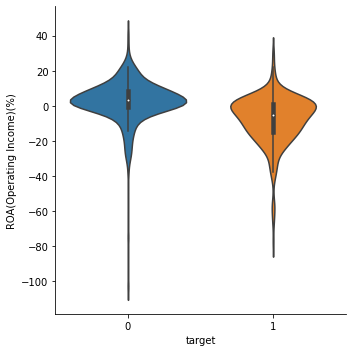

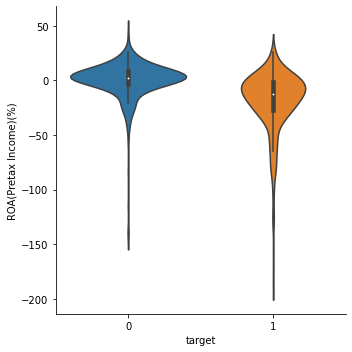

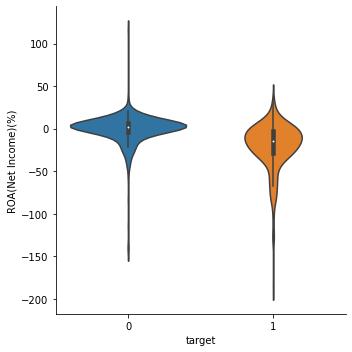

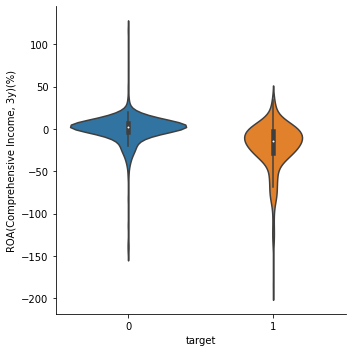

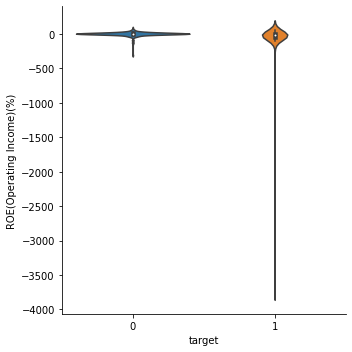

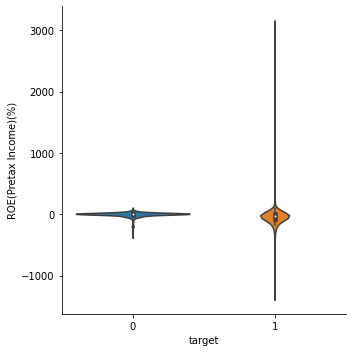

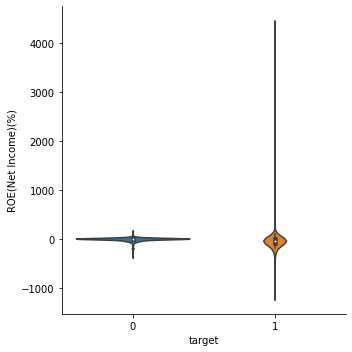

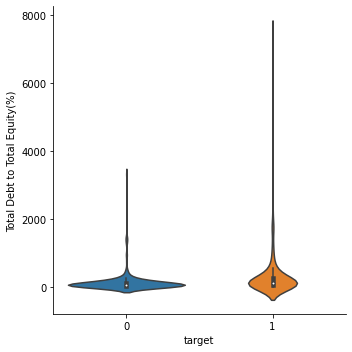

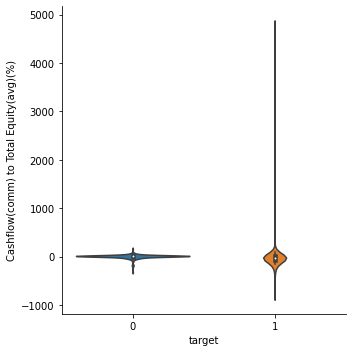

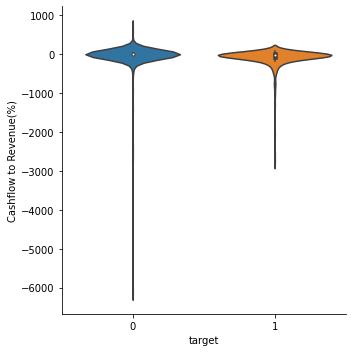

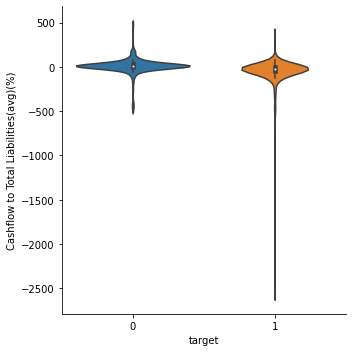

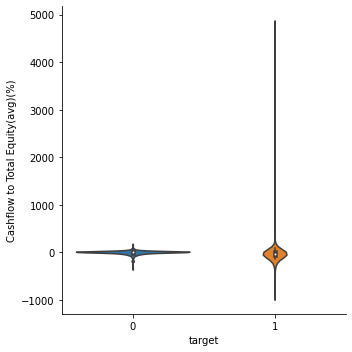

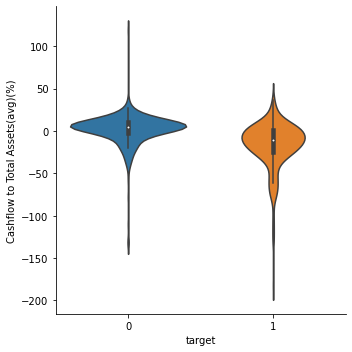

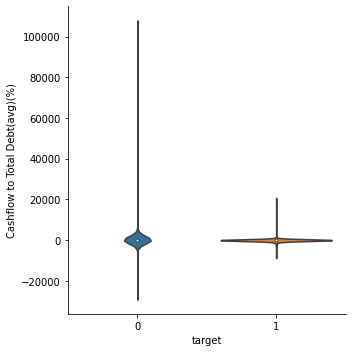

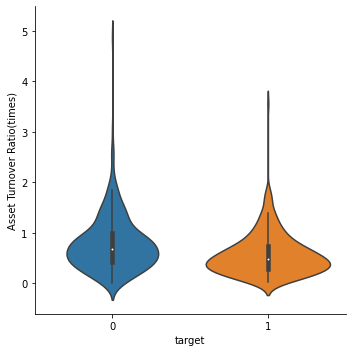

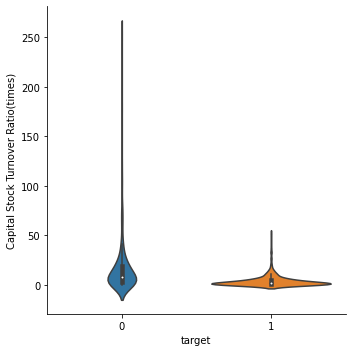

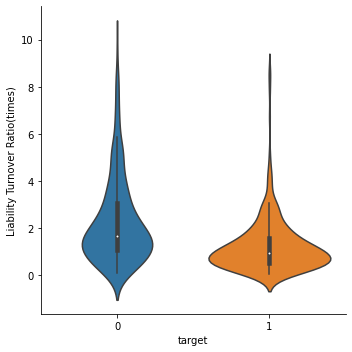

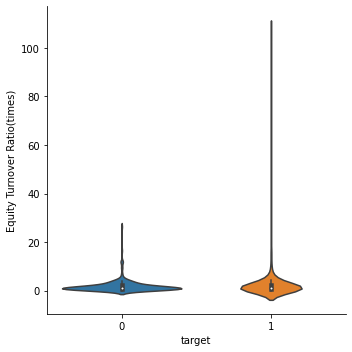

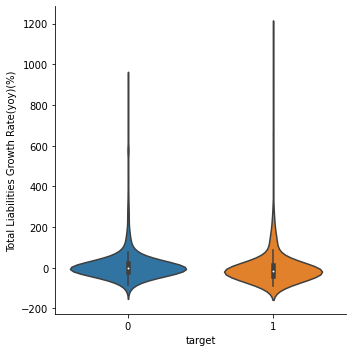

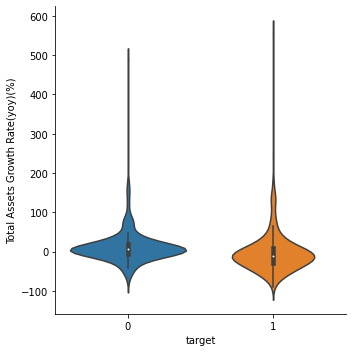

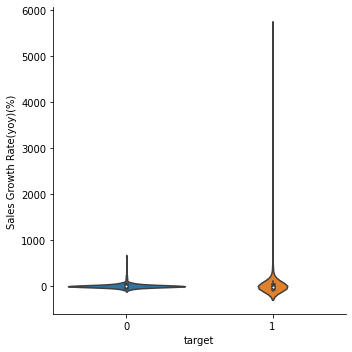

In [ ]:
# 관리종목과 비관리종목 간 차이 시각화

import matplotlib.pyplot as plt
import seaborn as sns

for i in model.columns[:-1]:
  sns.catplot(x='target',y=i, kind='violin',data=model)

관리종목과 비관리종목의 재무변수간 차이를 보자면 확실히 관리종목의 재무비율이 불건전성을 띄고 있고, 부채비율이 높은 것을 알 수 있다.

또한, 기업 표본에서 이상값이 도출됨에 따라 대표값을 알기 위해서는 평균보다는 중앙값이 재무변수를 대표한다고 볼 수 있다.

하지만, 관리종목과 비관리종목 간 차이가 없어도 특정 변수가 관리종목이 되는 유의한 변수로 판단할 수 있는 방법은 없다.


## 변수 간 상관관계 확인

In [ ]:
# 관리종목과 비관리종목으로 구분
admin_model = model[model['target'] == 1]
nonadmin_model = model[model['target'] ==0]

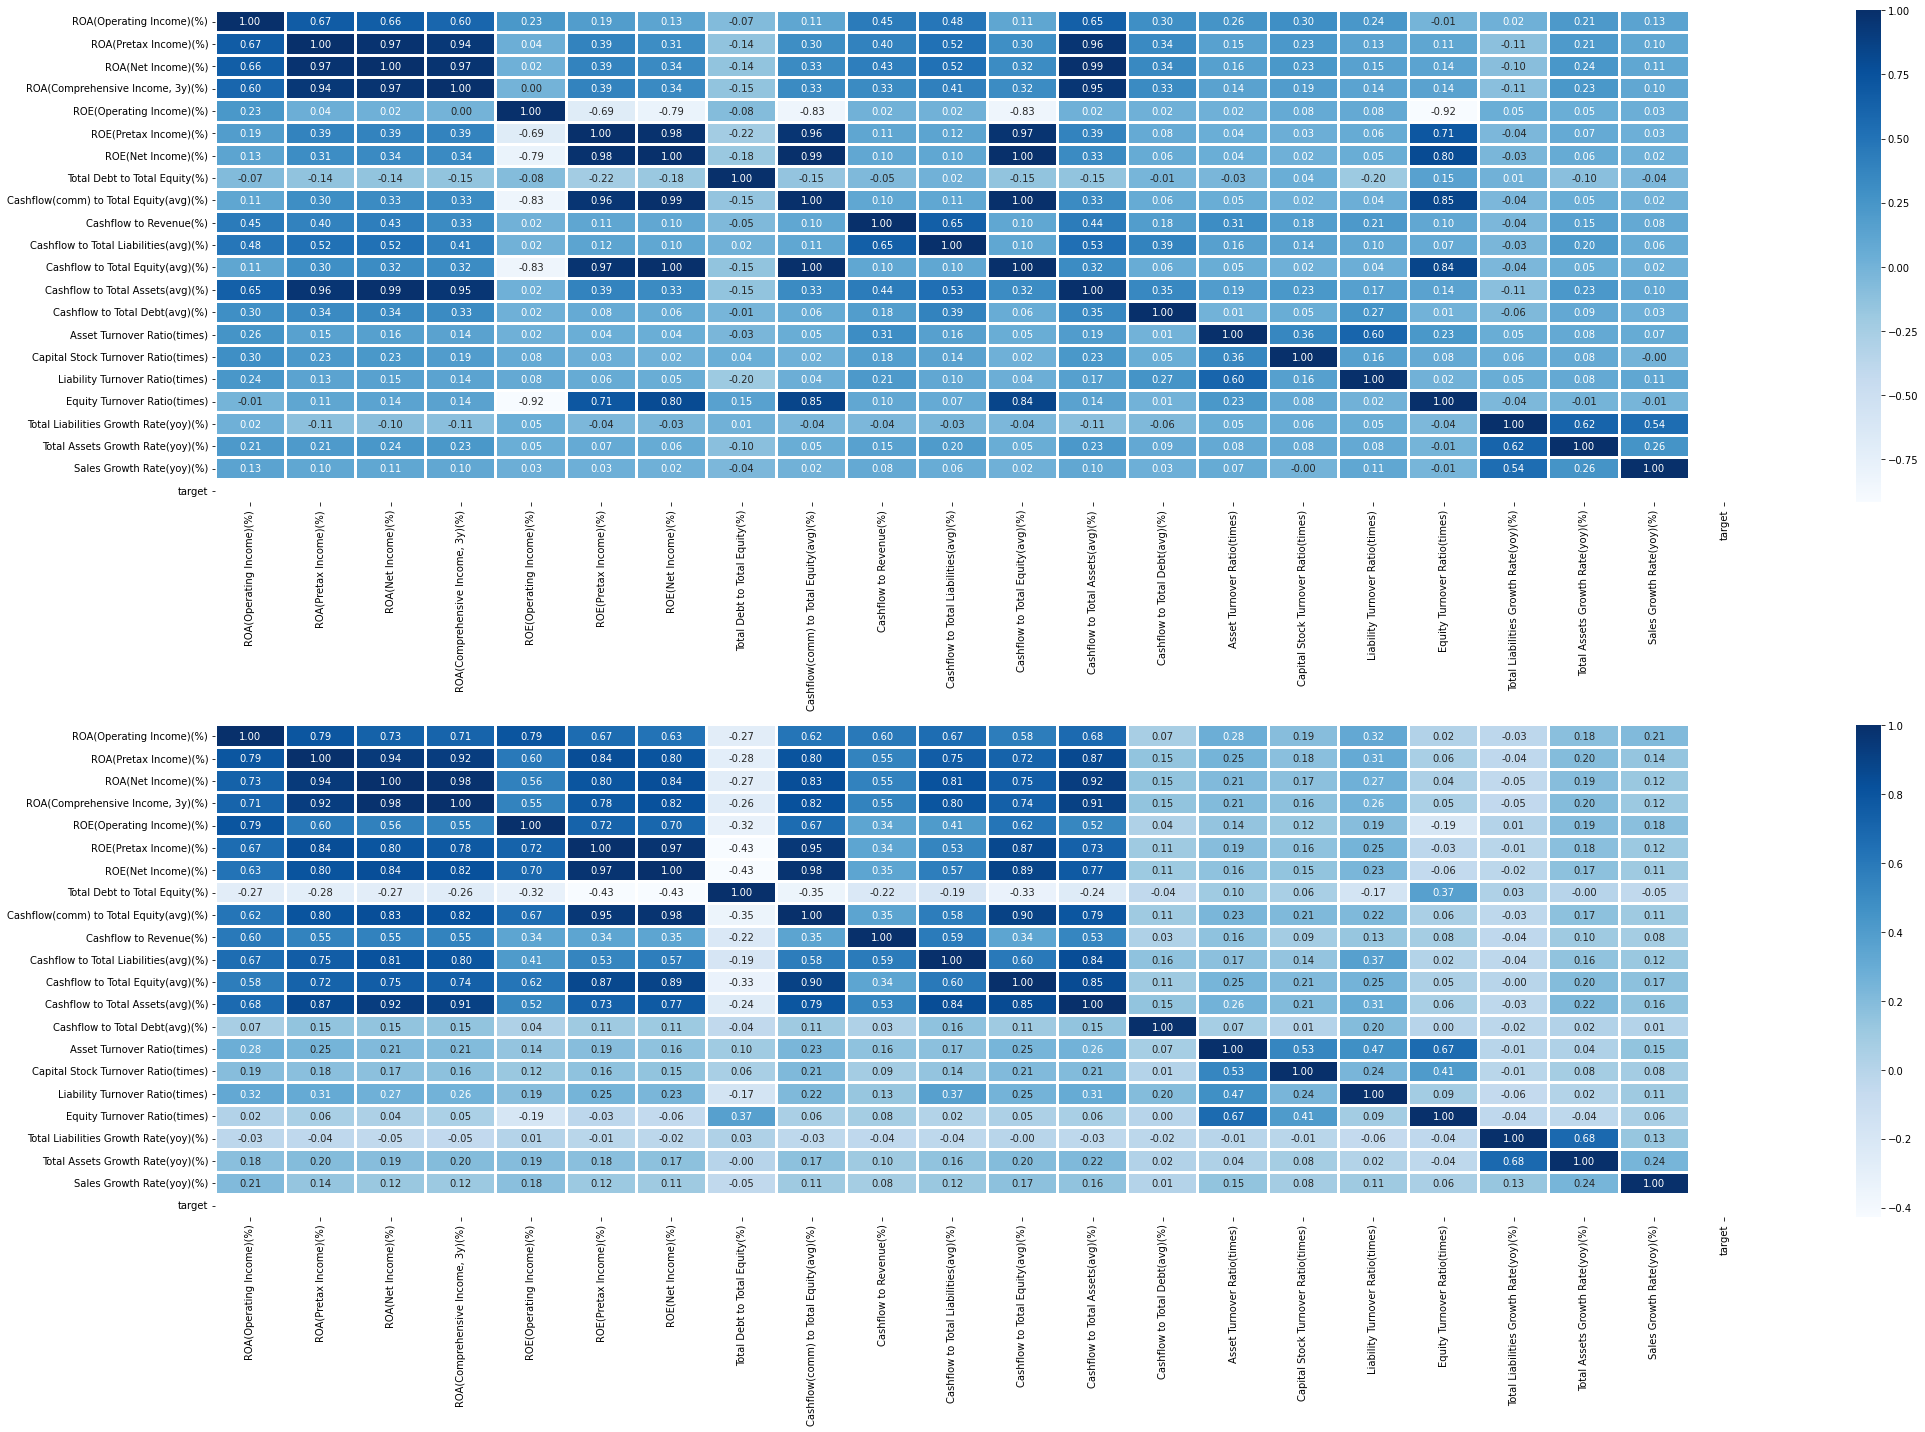

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(2,1,1) 
sns.heatmap(admin_model.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=2) # 관리종목 간 상관관계 확인

plt.subplot(2,1,2)
sns.heatmap(nonadmin_model.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=2) # 비관리종목 간 상관관계 확인

plt.tight_layout()
plt.show()

관리종목과 비관리종목의 변수간 상관관계 살펴보기

관리종목의 ROE(영업이익)는 ROE(세전영업이익), ROE(당기순이익), 자기자본현금흐름률, 현금흐름/총자본, 자본금회전율 간 음의 상관관계에 가깝다.

하지만, 비관리종목에서는 이러한 상관관계가 나타나지 않았다.

# 모델링, 평가

## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# 데이터셋 분할
X = model.iloc[:,:-1]
y = model.iloc[:,-1]

# 데이터 정규화 - 표준정규화, 최소최대정규화 큰 차이는 없음
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data= X, columns=model.columns[:-1]) 

# 훈련 데이터/ 검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

# 모델 설정, 훈련
model_lr = LogisticRegression(max_iter=10000,random_state=0) # 훈련 과정 10000번 수행
model_lr.fit(X_train,y_train)

# 점수화
print('학습데이터 점수: {:.4f}'.format(model_lr.score(X_train,y_train)))
print('평가데이터 점수: {:.4f}'.format(model_lr.score(X_test,y_test)))

#정확도
pred = model_lr.predict(X_test)
print('정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

학습데이터 점수: 0.7514
평가데이터 점수: 0.7698
정확도: 0.7698


In [ ]:
# 로지스틱 회귀분석에 대한 결과표
index_name = ['const'] + X.columns.tolist()
beta = np.concatenate([model_lr.intercept_, model_lr.coef_.reshape(-1)]).round(2)
odds = np.exp(beta).round(2)
interpret = np.where(beta>0, 'admin-risky','non_admin-risky')

beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret], index=index_name, columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,5.99,399.41,admin-risky
ROA(Operating Income)(%),-1.55,0.21,non_admin-risky
ROA(Pretax Income)(%),-2.08,0.12,non_admin-risky
ROA(Net Income)(%),-1.92,0.15,non_admin-risky
"ROA(Comprehensive Income, 3y)(%)",-1.99,0.14,non_admin-risky
ROE(Operating Income)(%),-0.53,0.59,non_admin-risky
ROE(Pretax Income)(%),-0.14,0.87,non_admin-risky
ROE(Net Income)(%),-0.08,0.92,non_admin-risky
Total Debt to Total Equity(%),0.9,2.46,admin-risky
Cashflow(comm) to Total Equity(avg)(%),0.02,1.02,admin-risky


로지스틱 회귀분석의 특성상, 직관적으로 해석하기에는 어려움이 있어 odds ratio에 대한 해석을 진행한다.

회귀계수 beta가 0 이하인 경우 관리종목이 될 확률이 낮아짐을 의미하며, 회귀계수 beta가 0 이상인 경우 관리종목이 될 확률이 높아짐을 의미한다.


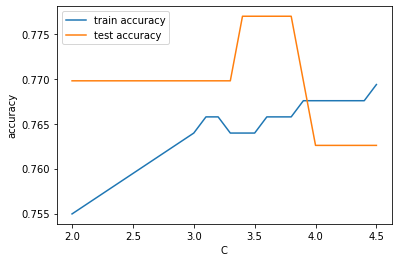

In [ ]:
# 하이퍼 파라미터 선택
train_accuracy = []
test_accuracy = []
C = [2,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5]
for i in C:
  lr = LogisticRegression(max_iter=10000,C=i,random_state=0)
  lr.fit(X_train,y_train)
  train_accuracy.append(lr.score(X_train,y_train))
  test_accuracy.append(lr.score(X_test,y_test))

plt.plot(C, train_accuracy, label='train accuracy')
plt.plot(C, test_accuracy, label='test accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

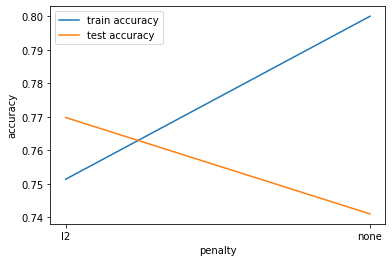

In [ ]:
train_accuracy = []
test_accuracy = []
penalty = ['l2','none']
for i in penalty:
  lr = LogisticRegression(max_iter=10000,penalty=i,random_state=0)
  lr.fit(X_train,y_train)
  train_accuracy.append(lr.score(X_train,y_train))
  test_accuracy.append(lr.score(X_test,y_test))

plt.plot(penalty, train_accuracy, label='train accuracy')
plt.plot(penalty, test_accuracy, label='test accuracy')
plt.xlabel('penalty')
plt.ylabel('accuracy')
plt.legend()
plt.show()

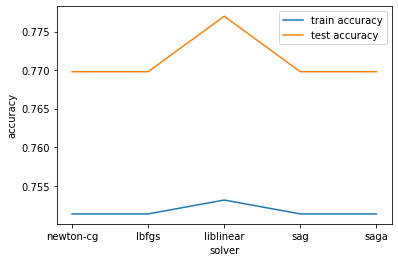

In [ ]:
train_accuracy = []
test_accuracy = []
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
  lr = LogisticRegression(max_iter=10000,solver=i,random_state=0)
  lr.fit(X_train,y_train)
  train_accuracy.append(lr.score(X_train,y_train))
  test_accuracy.append(lr.score(X_test,y_test))

plt.plot(solver, train_accuracy, label='train accuracy')
plt.plot(solver, test_accuracy, label='test accuracy')
plt.xlabel('solver')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter':[10000], # 반복횟수
              'C':[1,1.5], # 상수값에 대한 값 설정
              'penalty':['none','l1','l2','elasticnet'], # 정규화(regulazation) 설정
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # solver 설정
              }

grid_search = GridSearchCV(model_lr, param_grid= param_grid, cv=3, scoring='accuracy', n_jobs=-1) # 3겹 교차검증을 정확도순으로 수행

# 훈련
grid_search.fit(X_train,y_train)

# 결과 데이터 프레임에 저장
grid_scores_df = pd.DataFrame(grid_search.cv_results_)

# 출력
print('최적 점수: {}'.format(grid_search.best_score_))
print('최적 파라미터: {}'.format(grid_search.best_params_))
print(grid_search.best_estimator_)

최적 점수: 0.772972972972973
최적 파라미터: {'C': 1, 'max_iter': 10000, 'penalty': 'none', 'solver': 'sag'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
grid_scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078013,0.013729,0.001792,0.000060,1,10000,none,newton-cg,"{'C': 1, 'max_iter': 10000, 'penalty': 'none',...",0.724324,0.800000,0.789189,0.771171,0.033418,5
1,0.646176,0.234270,0.001590,0.000113,1,10000,none,lbfgs,"{'C': 1, 'max_iter': 10000, 'penalty': 'none',...",0.724324,0.800000,0.789189,0.771171,0.033418,5
2,0.001216,0.000179,0.000000,0.000000,1,10000,none,liblinear,"{'C': 1, 'max_iter': 10000, 'penalty': 'none',...",NaN,NaN,NaN,NaN,NaN,38
3,1.191203,0.041634,0.001853,0.000151,1,10000,none,sag,"{'C': 1, 'max_iter': 10000, 'penalty': 'none',...",0.729730,0.805405,0.783784,0.772973,0.031826,1
4,0.952164,0.287291,0.001803,0.000093,1,10000,none,saga,"{'C': 1, 'max_iter': 10000, 'penalty': 'none',...",0.729730,0.805405,0.783784,0.772973,0.031826,1
5,0.001029,0.000131,0.000000,0.000000,1,10000,l1,newton-cg,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', '...",NaN,NaN,NaN,NaN,NaN,37
6,0.000879,0.000051,0.000000,0.000000,1,10000,l1,lbfgs,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', '...",NaN,NaN,NaN,NaN,NaN,36
7,0.071205,0.000830,0.002062,0.000265,1,10000,l1,liblinear,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', '...",0.729730,0.794595,0.740541,0.754955,0.028375,10
8,0.002434,0.002166,0.000000,0.000000,1,10000,l1,sag,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', '...",NaN,NaN,NaN,NaN,NaN,35
9,0.241737,0.099746,0.002096,0.000105,1,10000,l1,saga,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', '...",0.718919,0.772973,0.751351,0.747748,0.022214,13


In [ ]:
# 평가 데이터에서 GridSearch 결과 평가 수행
model_lr = grid_search.best_estimator_ #LogisticRegression {'C': 1, 'max_iter': 10000, 'penalty': 'none', 'solver': 'sag'}

# 예측
pred = model_lr.predict(X_test)

# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 성능지표는 정확도(accuracy)로, 교차 검증 세트는 3개
scores = cross_val_score(model_lr, X, y, scoring='accuracy', cv=3)

# 점수 출력
print('평가데이터 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

# 교차검증에 대한 점수 출력
print('CV 점수: {}'.format(np.round(scores,4)))
print('CV 평균 점수: {}'.format(np.round(np.mean(scores),4)))

평가데이터 정확도: 0.7194
CV 점수: [0.7802 0.7316 0.7662]
CV 평균 점수: 0.7593


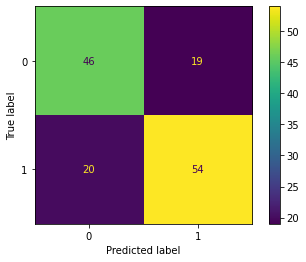

정확도:0.7194
정밀도:0.7397
재현율:0.7297
F1-Score:0.7347
Kappa Statistic:0.4370


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

# 혼동행렬 생성
confmat = confusion_matrix(y_test, pred)

#정확도
pred = model_lr.predict(X_test)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=model_lr.classes_)
disp.plot()
plt.show()

# 정밀도, 재현율, f1 score, kappa 확인
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1_score = f1_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test,pred)))
print('정밀도:{:.4f}'.format(precision))
print('재현율:{:.4f}'.format(recall))
print('F1-Score:{:.4f}'.format(f1_score))
print('Kappa Statistic:{:.4f}'.format(kappa))

정밀도(Precision) = TP / (FP+TP) : 관리종목으로 예측한 비율 중 실제 관리종목인 비율

재현율(Recall) = TP / (FN+TP): 실제 관리종목 중 관리종목으로 예측한 비율

정확도(Accuracy) = (TN+TP) / (TN+FP+FN+TP)

오류율 = (FN+FP) / (TN+FP+FN+TP) 

F1 Score = 2 * (precision * recall) / (precision + recall)

kappa statistic = (pre(a) - pr(e)) / (1 - pr(e)): 측정한 점주 값에 대한 일치도 확인

TN = 비관리종목 예측

TP = 관리종목 예측

FP = 관리종목으로 예측했지만 실제는 비관리종목

FN = 비관리종목으로 예측했지만 실제로는 관리종목

In [ ]:
from sklearn.metrics import classification_report

# 로지스틱 회귀분석에 대한 결과표
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        65
           1       0.74      0.73      0.73        74

    accuracy                           0.72       139
   macro avg       0.72      0.72      0.72       139
weighted avg       0.72      0.72      0.72       139



ROC AUC score: 0.7187


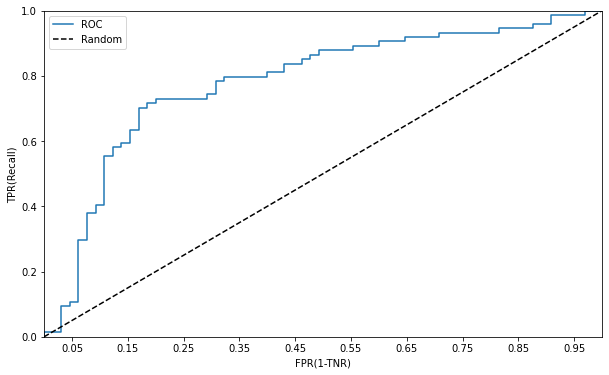

In [ ]:
# ROC, AUC 평가지표
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC, AUC 계산
roc_auc = roc_auc_score(y_test, pred)

# 시각화
pred_proba_class1 = model_lr.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure(figsize=(10,6))

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label= 'Random')

start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-TNR)')
plt.ylabel('TPR(Recall)')
plt.legend()

# AUC 점수 출력 
print('ROC AUC score: {:.4f}'.format(roc_auc))

X: FPR(거짓 긍정률) - 비관리종목 중 관리종목으로 잘못 예측한 비율

Y: TPR(참 긍정률 or recall) - 관리종목 중 관리종목으로 예측한 비율

## 의사결정나무

In [ ]:
# 의사결정나무를 통한 분석
from sklearn.tree import DecisionTreeClassifier

# X,y 데이터 세트 분리
X = model.iloc[:,:-1]
y = model.iloc[:,-1]

# 의사결정나무 분류기 생성
model_dtclf = DecisionTreeClassifier()

# 학습/데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 모델 학습
model_dtclf.fit(X_train, y_train)

# 점수화
print('학습데이터 점수: {:.4f}'.format(model_dtclf.score(X_train,y_train)))
print('평가데이터 점수: {:.4f}'.format(model_dtclf.score(X_test,y_test)))

#정확도
pred = model_dtclf.predict(X_test)
print('정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

학습데이터 점수: 0.9964
평가데이터 점수: 0.6906
정확도: 0.6906


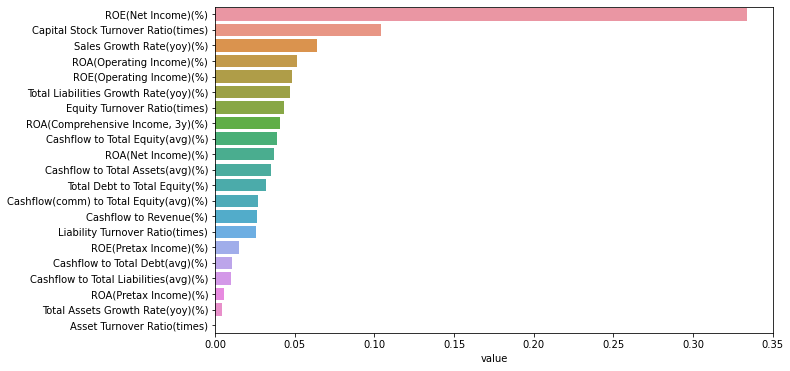

In [ ]:
# 변수별 중요도 산출 - DataFrame화
df = pd.DataFrame(data=model_dtclf.feature_importances_,index=X.columns,columns=['value'])
df_sorted = df.sort_values(by='value', ascending=False)

# 변수 중요도별 상위 시각화
plt.figure(figsize=(10,6))

sns.barplot(x=df_sorted['value'], y=df_sorted.index)

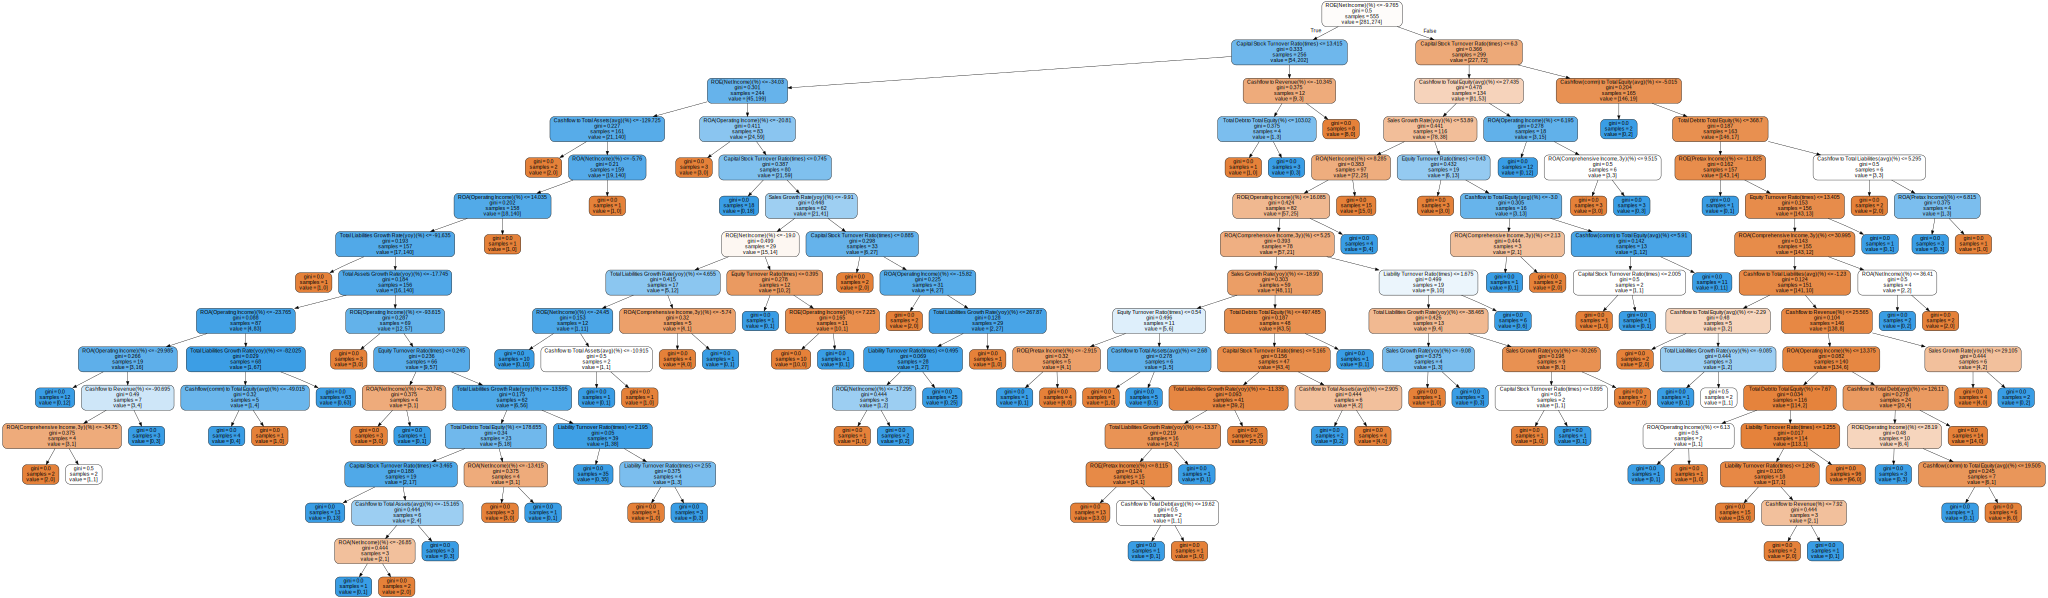

In [ ]:
# grapviz 분류 기준 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model_dtclf, out_file='tree.dot', feature_names=X.columns, filled=True, rounded=True)

with open('tree.dot') as f:
  dot_graph = f.read()
# max_depth에 제약이 없는 경우
graphviz.Source(dot_graph)

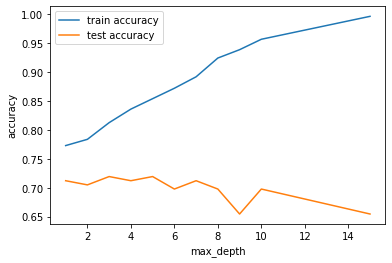

In [ ]:
# 하이퍼 파라미터 선택
train_accuracy = []
test_accuracy = []
max_depth = [1,2,3,4,5,6,7,8,9,10,15]
for i in max_depth:
  dt_clf = DecisionTreeClassifier(random_state=1, max_depth=i)
  dt_clf.fit(X_train,y_train)
  train_accuracy.append(dt_clf.score(X_train,y_train))
  test_accuracy.append(dt_clf.score(X_test,y_test))

plt.plot(max_depth, train_accuracy, label='train accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

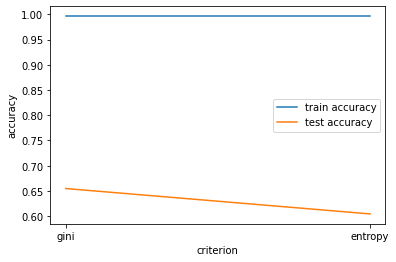

In [ ]:
train_accuracy = []
test_accuracy = []
criterion = ['gini','entropy']
for i in criterion:
  dt_clf = DecisionTreeClassifier(random_state=1, criterion=i)
  dt_clf.fit(X_train,y_train)
  train_accuracy.append(dt_clf.score(X_train,y_train))
  test_accuracy.append(dt_clf.score(X_test,y_test))

plt.plot(criterion, train_accuracy, label='train accuracy')
plt.plot(criterion, test_accuracy, label='test accuracy')
plt.xlabel('criterion')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10], # 결정트리의 최대 트리 깊이 설정
              'min_samples_split':[1,2,3,4,5], # 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 설정
              'min_samples_leaf':[1,2,3,4,5] # 리프 노드가 될 수 있는 데이터 건수의 최솟값 설정
              }

grid_search = GridSearchCV(model_dtclf, param_grid= param_grid, cv=3, scoring='accuracy', n_jobs=-1) # 3겹 교차검증을 정확도순으로 수행

# 훈련
grid_search.fit(X_train,y_train)

# 결과 데이터 프레임에 저장
grid_scores_df = pd.DataFrame(grid_search.cv_results_)

# 출력
print('최적 점수: {}'.format(grid_search.best_score_))
print('최적 파라미터: {}'.format(grid_search.best_params_))
print(grid_search.best_estimator_)

최적 점수: 0.7711711711711712
최적 파라미터: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
grid_scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005493,0.001865,0.000000,0.000000,1,1,1,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,250
1,0.003752,0.000097,0.001489,0.000081,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.783784,0.729730,0.767568,0.760360,0.022648,21
2,0.005696,0.000915,0.002030,0.000615,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.783784,0.729730,0.767568,0.760360,0.022648,21
3,0.003536,0.000065,0.001474,0.000035,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.783784,0.729730,0.767568,0.760360,0.022648,21
4,0.003310,0.000129,0.001391,0.000069,1,1,5,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.783784,0.729730,0.767568,0.760360,0.022648,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.002050,0.000143,0.000000,0.000000,10,5,1,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",NaN,NaN,NaN,NaN,NaN,218
246,0.009477,0.000801,0.001736,0.000355,10,5,2,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.697297,0.681081,0.681081,0.686486,0.007644,190
247,0.008313,0.000167,0.001636,0.000348,10,5,3,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.691892,0.686486,0.681081,0.686486,0.004413,190
248,0.008534,0.000454,0.001479,0.000054,10,5,4,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.713514,0.681081,0.686486,0.693694,0.014187,175


In [ ]:
# 평가 데이터에서 GridSearch 결과 평가 수행
model_dtclf = grid_search.best_estimator_ #{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

# 예측
pred = model_dtclf.predict(X_test)

# 점수 출력
print('평가데이터 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 성능지표는 정확도(accuracy)로, 교차 검증 세트는 3개
scores = cross_val_score(model_dtclf, X, y, scoring='accuracy', cv=3)

# 교차검증에 대한 점수 출력
print('CV 점수: {}'.format(np.round(scores,4)))
print('CV 평균 점수: {}'.format(np.round(np.mean(scores),4)))

평가데이터 정확도: 0.7050
CV 점수: [0.7759 0.7273 0.7446]
CV 평균 점수: 0.7492


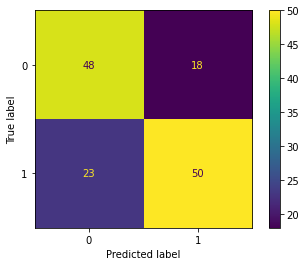

정확도:0.7050
정밀도:0.7353
재현율:0.6849
F1-Score:0.7092
Kappa Statistic:0.4107


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

# 혼동행렬 생성
confmat = confusion_matrix(y_test, pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=model_dtclf.classes_)
disp.plot()
plt.show()

# 정밀도, 재현율, f1 score, kappa 확인
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1_score = f1_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test,pred)))
print('정밀도:{:.4f}'.format(precision))
print('재현율:{:.4f}'.format(recall))
print('F1-Score:{:.4f}'.format(f1_score))
print('Kappa Statistic:{:.4f}'.format(kappa))

In [ ]:
# 결과표 출력
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        66
           1       0.74      0.68      0.71        73

    accuracy                           0.71       139
   macro avg       0.71      0.71      0.70       139
weighted avg       0.71      0.71      0.71       139



ROC AUC score: 0.7061


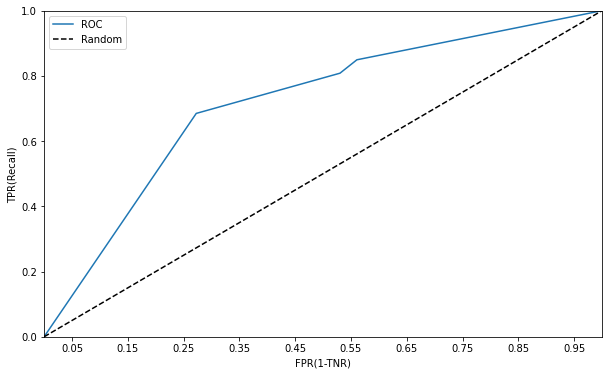

In [ ]:
# ROC, AUC 평가지표
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC, AUC 계산
roc_auc = roc_auc_score(y_test, pred)

# 시각화
pred_proba_class1 = model_dtclf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure(figsize=(10,6))

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label= 'Random')

start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-TNR)')
plt.ylabel('TPR(Recall)')
plt.legend()

# AUC 점수 출력 
print('ROC AUC score: {:.4f}'.format(roc_auc))

## 서포트 벡터 머신

In [ ]:
# 서포트 벡터 머신을 통한 분석
from sklearn.svm import SVC

# X,y 데이터 세트 분리
X = model.iloc[:,:-1]
y = model.iloc[:,-1]

# 데이터 정규화 - 표준정규화, 최소최대정규화 큰 차이는 없음
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data= X, columns=model.columns[:-1]) 

# 학습/데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# SVC 분류기 생성
model_svc = SVC()
model_linear_svc = SVC(kernel='linear') # 선형 커널
model_polynominal_svc = SVC(kernel='poly') # 다항형 커널
model_rbf_svc = SVC(kernel='rbf') # RBF 커널

# 모델 학습
model_linear_svc.fit(X_train, y_train)
model_polynominal_svc.fit(X_train,y_train)
model_rbf_svc.fit(X_train,y_train)

# 점수화
print('Linear SVC 학습데이터 점수: {:.4f}'.format(model_linear_svc.score(X_train,y_train)))
print('Linear SVC 평가데이터 점수: {:.4f}'.format(model_linear_svc.score(X_test,y_test)))

print('Polynomial SVC 학습데이터 점수: {:.4f}'.format(model_polynominal_svc.score(X_train,y_train)))
print('Polynomial SVC 평가데이터 점수: {:.4f}'.format(model_polynominal_svc.score(X_test,y_test)))

print('RBF SVC 학습데이터 점수: {:.4f}'.format(model_rbf_svc.score(X_train,y_train)))
print('RBF SVC 평가데이터 점수: {:.4f}'.format(model_rbf_svc.score(X_test,y_test)))

Linear SVC 학습데이터 점수: 0.7622
Linear SVC 평가데이터 점수: 0.7410
Polynomial SVC 학습데이터 점수: 0.7856
Polynomial SVC 평가데이터 점수: 0.7410
RBF SVC 학습데이터 점수: 0.7586
RBF SVC 평가데이터 점수: 0.7338


원본 데이터 사용 시 학습 시간이 5분 가량 걸림.. 또한 예측력도 정규화한 데이터에 비해 상당히 낮음을 확인할 수 있음

Linear SVC 학습데이터 점수: 0.7910

Linear SVC 평가데이터 점수: 0.7194

Polynomial SVC 학습데이터 점수: 0.5171

Polynomial SVC 평가데이터 점수: 0.4532

RBF SVC 학습데이터 점수: 0.6559

RBF SVC 평가데이터 점수: 0.6043

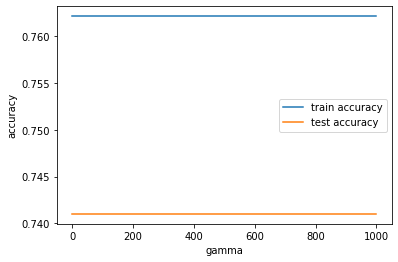

In [ ]:
# 하이퍼 파라미터 선택
train_accuracy = []
test_accuracy = []
gamma = [0.001,0.01,0.1,1,10,1000]
for i in gamma:
  svc = SVC(random_state=2, kernel='linear', gamma=i)
  svc.fit(X_train,y_train)
  train_accuracy.append(svc.score(X_train,y_train))
  test_accuracy.append(svc.score(X_test,y_test))

plt.plot(gamma, train_accuracy, label='train accuracy')
plt.plot(gamma, test_accuracy, label='test accuracy')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.legend()
plt.show()

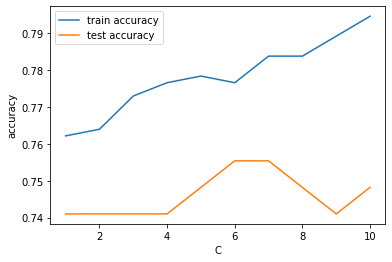

In [ ]:
train_accuracy = []
test_accuracy = []
C = [1,2,3,4,5,6,7,8,9,10]
for i in C:
  svc = SVC(random_state=2, kernel='linear', C=i)
  svc.fit(X_train,y_train)
  train_accuracy.append(svc.score(X_train,y_train))
  test_accuracy.append(svc.score(X_test,y_test))

plt.plot(C, train_accuracy, label='train accuracy')
plt.plot(C, test_accuracy, label='test accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

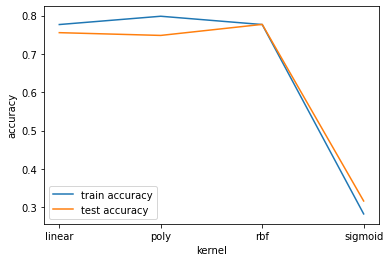

In [ ]:
train_accuracy = []
test_accuracy = []
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel:
  svc = SVC(random_state=2, kernel=i, C=6)
  svc.fit(X_train,y_train)
  train_accuracy.append(svc.score(X_train,y_train))
  test_accuracy.append(svc.score(X_test,y_test))

plt.plot(kernel, train_accuracy, label='train accuracy')
plt.plot(kernel, test_accuracy, label='test accuracy')
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[3.8,4,4.2,4.4,4.6],
              'gamma':['scale','auto'], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[3,4,5,6] 
              }

grid_search = GridSearchCV(model_svc, param_grid= param_grid, cv=3, scoring='accuracy', n_jobs=-1) # 3겹 교차검증을 정확도순으로 수행

# 훈련
grid_search.fit(X_train,y_train)

# 결과 데이터 프레임에 저장
grid_scores_df = pd.DataFrame(grid_search.cv_results_)

# 출력
print('최적 점수: {}'.format(grid_search.best_score_))
print('최적 파라미터: {}'.format(grid_search.best_params_))
print(grid_search.best_estimator_)

최적 점수: 0.7783783783783784
최적 파라미터: {'C': 4, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008599,0.000324,0.003168,0.000279,3.8,3,scale,linear,"{'C': 3.8, 'degree': 3, 'gamma': 'scale', 'ker...",0.745946,0.789189,0.762162,0.765766,0.017837,10
1,0.011449,0.001957,0.003482,0.000090,3.8,3,scale,poly,"{'C': 3.8, 'degree': 3, 'gamma': 'scale', 'ker...",0.751351,0.800000,0.778378,0.776577,0.019902,3
2,0.013069,0.002018,0.005335,0.000496,3.8,3,scale,rbf,"{'C': 3.8, 'degree': 3, 'gamma': 'scale', 'ker...",0.751351,0.778378,0.740541,0.756757,0.015913,69
3,0.018476,0.001908,0.008175,0.000069,3.8,3,scale,sigmoid,"{'C': 3.8, 'degree': 3, 'gamma': 'scale', 'ker...",0.286486,0.281081,0.270270,0.279279,0.006742,145
4,0.009414,0.001604,0.003208,0.000069,3.8,3,auto,linear,"{'C': 3.8, 'degree': 3, 'gamma': 'auto', 'kern...",0.745946,0.789189,0.762162,0.765766,0.017837,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.018044,0.000633,0.008212,0.000095,4.6,6,scale,sigmoid,"{'C': 4.6, 'degree': 6, 'gamma': 'scale', 'ker...",0.286486,0.275676,0.259459,0.273874,0.011107,157
156,0.007215,0.000420,0.003242,0.000265,4.6,6,auto,linear,"{'C': 4.6, 'degree': 6, 'gamma': 'auto', 'kern...",0.745946,0.789189,0.762162,0.765766,0.017837,10
157,0.008498,0.001472,0.003454,0.000639,4.6,6,auto,poly,"{'C': 4.6, 'degree': 6, 'gamma': 'auto', 'kern...",0.508108,0.508108,0.508108,0.508108,0.000000,126
158,0.009497,0.001557,0.004331,0.000904,4.6,6,auto,rbf,"{'C': 4.6, 'degree': 6, 'gamma': 'auto', 'kern...",0.751351,0.756757,0.691892,0.733333,0.029386,97


In [ ]:
# 평가 데이터에서 GridSearch 결과 평가 수행
model_svc = SVC(C=4, degree=3, gamma='scale', kernel='poly', probability=True) #{'C': 4, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
model_svc.fit(X_train,y_train)

# 예측
pred = model_svc.predict(X_test)

# 점수 출력
print('평가데이터 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 성능지표는 정확도(accuracy)로, 교차 검증 세트는 3개
scores = cross_val_score(model_svc, X, y, scoring='accuracy', cv=3)

# 교차검증에 대한 점수 출력
print('CV 점수: {}'.format(np.round(scores,4)))
print('CV 평균 점수: {}'.format(np.round(np.mean(scores),4)))

평가데이터 정확도: 0.7482
CV 점수: [0.7457 0.7446 0.7879]
CV 평균 점수: 0.7594


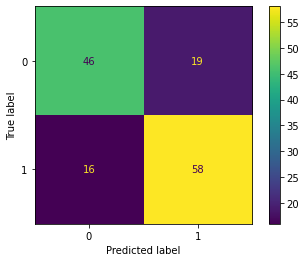

정확도:0.7482
정밀도:0.7532
재현율:0.7838
F1-Score:0.7682
Kappa Statistic:0.4929


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

# 혼동행렬 생성
confmat = confusion_matrix(y_test, pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=model_svc.classes_)
disp.plot()
plt.show()

# 정밀도, 재현율, f1 score, kappa 확인
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1_score = f1_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test,pred)))
print('정밀도:{:.4f}'.format(precision))
print('재현율:{:.4f}'.format(recall))
print('F1-Score:{:.4f}'.format(f1_score))
print('Kappa Statistic:{:.4f}'.format(kappa))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        65
           1       0.75      0.78      0.77        74

    accuracy                           0.75       139
   macro avg       0.75      0.75      0.75       139
weighted avg       0.75      0.75      0.75       139



ROC AUC score: 0.7457


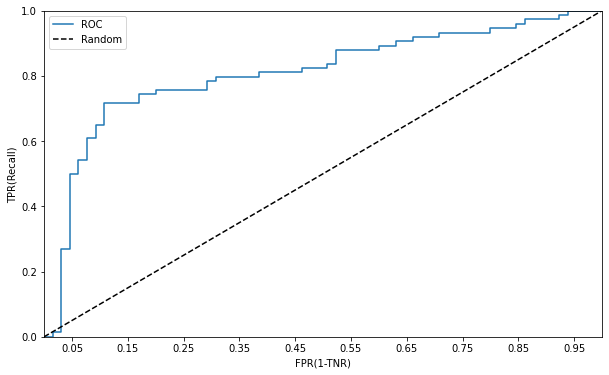

In [ ]:
# ROC, AUC 평가지표
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC, AUC 계산
roc_auc = roc_auc_score(y_test, pred)

# 시각화
pred_proba_class1 = model_svc.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure(figsize=(10,6))

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label= 'Random')

start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-TNR)')
plt.ylabel('TPR(Recall)')
plt.legend()

# AUC 점수 출력 
print('ROC AUC score: {:.4f}'.format(roc_auc))

## 앙상블-보팅

In [ ]:
# 필요한 라이브러리 임포팅
from sklearn.ensemble import VotingClassifier

# 로지스틱 회귀, 의사결정나무, 서포트 벡터 머신을 기반으로 한 소포트 보팅 방식으로 새로운 보팅 분류기 생성 - 하이퍼 파라미터 값 적용
lr_clf = LogisticRegression(penalty='none',solver='sag',max_iter=10000, C=1)
dt_clf = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=2)
svc_clf = SVC(C=4,kernel='poly',gamma='scale',degree=3,probability=True)

# 보팅 분류기 생성
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('dt', dt_clf),('svc',svc_clf)], voting='soft')

# 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)

# 점수화
print('학습데이터 점수: {:.4f}'.format(vo_clf.score(X_train,y_train)))
print('평가데이터 점수: {:.4f}'.format(vo_clf.score(X_test,y_test)))

# 정확도
print('Voting test 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

학습데이터 점수: 0.8144
평가데이터 점수: 0.7338
Voting test 분류기 정확도: 0.7338


In [ ]:
# 필요한 라이브러리 임포팅
from sklearn.ensemble import VotingClassifier

# 데이터셋 분할
X = model.iloc[:,:-1]
y = model.iloc[:,-1]

# 데이터 정규화 - 표준정규화, 최소최대정규화 큰 차이는 없음
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data= X, columns=model.columns[:-1]) 

# 훈련 데이터/ 검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 3)

# 로지스틱 회귀, 랜덤포레스트, 서포트 벡터 머신을 기반으로 한 소포트 보팅 방식으로 새로운 보팅 분류기 생성 - 하이퍼 파라미터 값 적용
lr_clf = LogisticRegression(penalty='none',solver='sag',max_iter=10000, C=1)
rf_clf = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=1000)
svc_clf = SVC(C=4,kernel='poly',gamma='scale',degree=3,probability=True)

# 보팅 분류기 생성
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('rf', rf_clf),('svc',svc_clf)], voting='soft')

# 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)

# 점수화
print('학습데이터 점수: {:.4f}'.format(vo_clf.score(X_train,y_train)))
print('평가데이터 점수: {:.4f}'.format(vo_clf.score(X_test,y_test)))

# 정확도
print('Voting test 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

학습데이터 점수: 0.8396
평가데이터 점수: 0.7770
Voting test 분류기 정확도: 0.7770


In [ ]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 성능지표는 정확도(accuracy)로, 교차 검증 세트는 3개
scores = cross_val_score(vo_clf, X, y, scoring='accuracy', cv=3)

# 교차검증에 대한 점수 출력
print('CV 점수: {}'.format(np.round(scores,4)))
print('CV 평균 점수: {}'.format(np.round(np.mean(scores),4)))

CV 점수: [0.7802 0.7489 0.7879]
CV 평균 점수: 0.7723


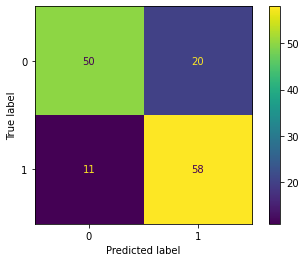

정확도:0.7770
정밀도:0.7436
재현율:0.8406
F1-Score:0.7891
Kappa Statistic:0.5543


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

# 혼동행렬 생성
confmat = confusion_matrix(y_test, pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=vo_clf.classes_)
disp.plot()
plt.show()

# 정밀도, 재현율, f1 score, kappa 확인
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1_score = f1_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test,pred)))
print('정밀도:{:.4f}'.format(precision))
print('재현율:{:.4f}'.format(recall))
print('F1-Score:{:.4f}'.format(f1_score))
print('Kappa Statistic:{:.4f}'.format(kappa))

ROC AUC score: 0.7774


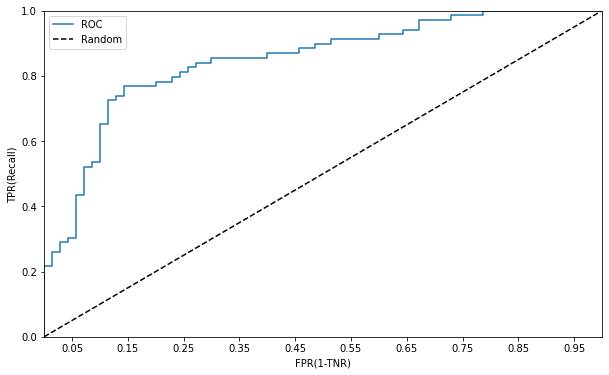

In [ ]:
# ROC, AUC 평가지표
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC, AUC 계산
roc_auc = roc_auc_score(y_test, pred)

# 시각화
pred_proba_class1 = vo_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure(figsize=(10,6))

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label= 'Random')

start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-TNR)')
plt.ylabel('TPR(Recall)')
plt.legend()

# AUC 점수 출력 
print('ROC AUC score: {:.4f}'.format(roc_auc))

## 앙상블-배깅(랜덤포레스트)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 데이터셋 분할
X = model.iloc[:,:-1]
y = model.iloc[:,-1]

# 데이터 분류 - 원본 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 랜덤 포레스트 학습, 예측 성능 평가
model_rfclf = RandomForestClassifier(random_state=4)
model_rfclf.fit(X_train,y_train)

# 점수화
print('학습데이터 점수: {:.4f}'.format(model_rfclf.score(X_train,y_train)))
print('평가데이터 점수: {:.4f}'.format(model_rfclf.score(X_test,y_test)))

#정확도
pred = model_rfclf.predict(X_test)
print('정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

학습데이터 점수: 0.9982
평가데이터 점수: 0.6906
정확도: 0.6906


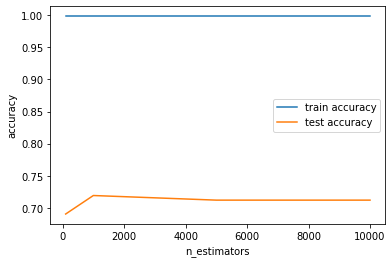

In [ ]:
# 하이퍼 파라미터 선택
train_accuracy = []
test_accuracy = []
n_estimators = [100,1000,5000,10000]
for i in n_estimators:
  rf_clf = RandomForestClassifier(random_state=4, n_estimators=i)
  rf_clf.fit(X_train,y_train)
  train_accuracy.append(rf_clf.score(X_train,y_train))
  test_accuracy.append(rf_clf.score(X_test,y_test))

plt.plot(n_estimators, train_accuracy, label='train accuracy')
plt.plot(n_estimators, test_accuracy, label='test accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.show()

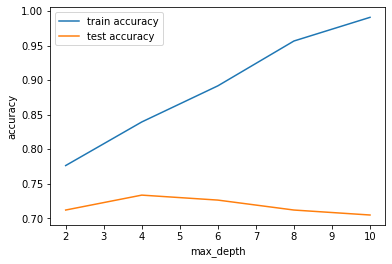

In [ ]:
train_accuracy = []
test_accuracy = []
max_depth = [2,4,6,8,10]
for i in max_depth:
  rf_clf = RandomForestClassifier(random_state=4, n_estimators=1000, max_depth=i)
  rf_clf.fit(X_train,y_train)
  train_accuracy.append(rf_clf.score(X_train,y_train))
  test_accuracy.append(rf_clf.score(X_test,y_test))

plt.plot(max_depth, train_accuracy, label='train accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

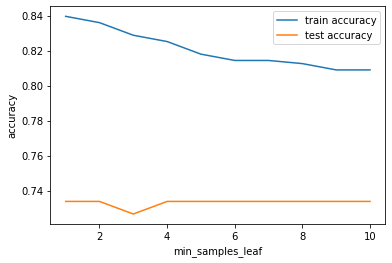

In [ ]:
train_accuracy = []
test_accuracy = []
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
for i in min_samples_leaf:
  rf_clf = RandomForestClassifier(random_state=4, n_estimators=1000, max_depth=4,min_samples_leaf=i)
  rf_clf.fit(X_train,y_train)
  train_accuracy.append(rf_clf.score(X_train,y_train))
  test_accuracy.append(rf_clf.score(X_test,y_test))

plt.plot(min_samples_leaf, train_accuracy, label='train accuracy')
plt.plot(min_samples_leaf, test_accuracy, label='test accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()

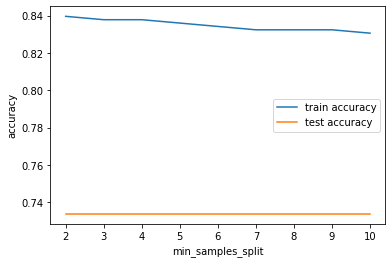

In [ ]:
train_accuracy = []
test_accuracy = []
min_samples_split = [2,3,4,5,6,7,8,9,10]
for i in min_samples_split:
  rf_clf = RandomForestClassifier(random_state=4, n_estimators=1000, max_depth=4,min_samples_split=i)
  rf_clf.fit(X_train,y_train)
  train_accuracy.append(rf_clf.score(X_train,y_train))
  test_accuracy.append(rf_clf.score(X_test,y_test))

plt.plot(min_samples_split, train_accuracy, label='train accuracy')
plt.plot(min_samples_split, test_accuracy, label='test accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[1000],
              'max_depth':[2,4,6,8], # 결정트리의 최대 트리 깊이 설정
              'min_samples_split':[2,6,10], # 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 설정
              'min_samples_leaf':[2,4,6,8] # 리프 노드가 될 수 있는 데이터 건수의 최솟값 설정
              }

grid_search = GridSearchCV(model_rfclf, param_grid= param_grid, cv=3, scoring='accuracy', n_jobs=-1) # 3겹 교차검증을 정확도순으로 수행

# 훈련
grid_search.fit(X_train,y_train)

# 결과 데이터 프레임에 저장
grid_scores_df = pd.DataFrame(grid_search.cv_results_)

# 출력 (35분걸림..)
print('최적 점수: {}'.format(grid_search.best_score_))
print('최적 파라미터: {}'.format(grid_search.best_params_))
print(grid_search.best_estimator_)

최적 점수: 0.8036036036036037
최적 파라미터: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)


In [ ]:
grid_scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.539293,0.026735,0.153814,0.005192,2,2,2,1000,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
1,2.518171,0.003967,0.164755,0.007425,2,2,6,1000,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
2,2.487036,0.017374,0.153875,0.002252,2,2,10,1000,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
3,2.504287,0.011092,0.158546,0.003807,2,4,2,1000,"{'max_depth': 2, 'min_samples_leaf': 4, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
4,2.515411,0.021903,0.153543,0.000625,2,4,6,1000,"{'max_depth': 2, 'min_samples_leaf': 4, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
5,2.526611,0.019185,0.154583,0.005072,2,4,10,1000,"{'max_depth': 2, 'min_samples_leaf': 4, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
6,2.531869,0.006008,0.159109,0.004780,2,6,2,1000,"{'max_depth': 2, 'min_samples_leaf': 6, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
7,2.532212,0.023198,0.155514,0.003459,2,6,6,1000,"{'max_depth': 2, 'min_samples_leaf': 6, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
8,2.541920,0.016340,0.162522,0.003429,2,6,10,1000,"{'max_depth': 2, 'min_samples_leaf': 6, 'min_s...",0.756757,0.751351,0.756757,0.754955,2.548133e-03,40
9,2.538282,0.018921,0.157255,0.002864,2,8,2,1000,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.756757,0.756757,0.756757,0.756757,1.110223e-16,37


In [ ]:
# 최적 파라미터 찾은 후의 결과 
model_rfclf = grid_search.best_estimator_  #{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1000}

#정확도
pred = model_rfclf.predict(X_test)
print('정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 성능지표는 정확도(accuracy)로, 교차 검증 세트는 3개
scores = cross_val_score(model_rfclf, X, y, scoring='accuracy', cv=3)

# 교차검증에 대한 점수 출력
print('CV 점수: {}'.format(np.round(scores,4)))
print('CV 평균 점수: {}'.format(np.round(np.mean(scores),4)))

정확도: 0.7410
CV 점수: [0.75   0.7835 0.7489]
CV 평균 점수: 0.7608


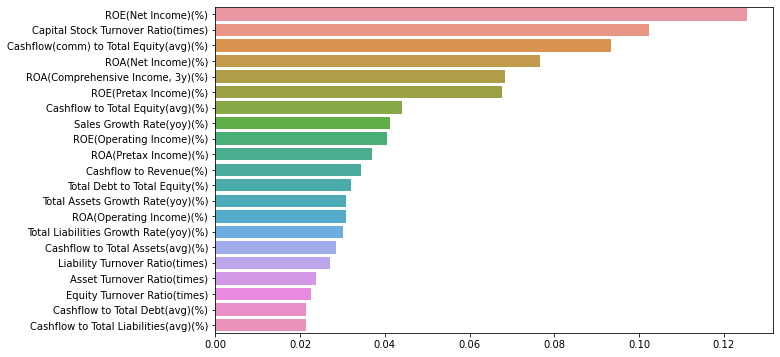

In [ ]:
# 변수 중요도 산출
ftr_importances_values = model_rfclf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 상위 추출
ftr_importances_sorted = ftr_importances.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=ftr_importances_sorted, y=ftr_importances_sorted.index)
plt.show()

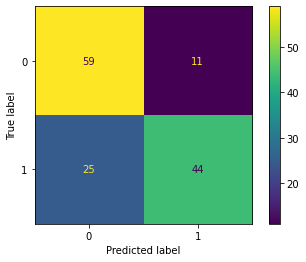

정확도:0.7410
정밀도:0.8000
재현율:0.6377
F1-Score:0.7097
Kappa Statistic:0.4812


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

# 혼동행렬 생성
confmat = confusion_matrix(y_test, pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=model_rfclf.classes_)
disp.plot()
plt.show()

# 정밀도, 재현율, f1 score, kappa 확인
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1_score = f1_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test,pred)))
print('정밀도:{:.4f}'.format(precision))
print('재현율:{:.4f}'.format(recall))
print('F1-Score:{:.4f}'.format(f1_score))
print('Kappa Statistic:{:.4f}'.format(kappa))

ROC AUC score: 0.7403


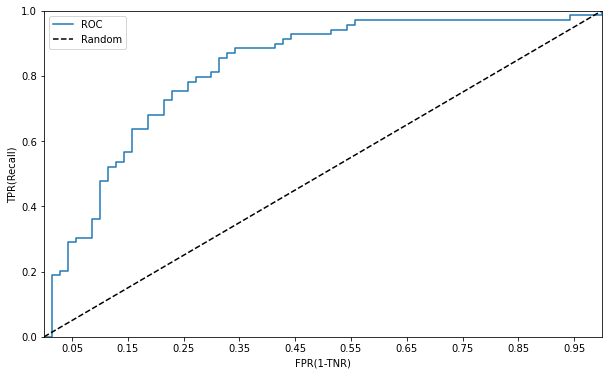

In [ ]:
# ROC, AUC 평가지표
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC, AUC 계산
roc_auc = roc_auc_score(y_test, pred)

# 시각화
pred_proba_class1 = model_rfclf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure(figsize=(10,6))

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label= 'Random')

start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-TNR)')
plt.ylabel('TPR(Recall)')
plt.legend()

# AUC 점수 출력 
print('ROC AUC score: {:.4f}'.format(roc_auc))

## 앙상블-부스팅(light Gradient Boosting Machine)

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.metrics import roc_auc_score, accuracy_score

# 데이터셋 분할
X = model.iloc[:,:-1]
y = model.iloc[:,-1]

# 학습/평가 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# 분류기 생성
model_lgbm = LGBMClassifier(n_estimator=500)

# 조기 중단 수행
evals= [(X_test, y_test)]
model_lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

# 예측
pred = model_lgbm.predict(X_test)
print('점수{}'.format(accuracy_score(y_test,pred)))

[1]	valid_0's binary_logloss: 0.657097	valid_0's binary_logloss: 0.657097
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.628476	valid_0's binary_logloss: 0.628476
[3]	valid_0's binary_logloss: 0.602626	valid_0's binary_logloss: 0.602626
[4]	valid_0's binary_logloss: 0.581765	valid_0's binary_logloss: 0.581765
[5]	valid_0's binary_logloss: 0.569624	valid_0's binary_logloss: 0.569624
[6]	valid_0's binary_logloss: 0.554159	valid_0's binary_logloss: 0.554159
[7]	valid_0's binary_logloss: 0.543139	valid_0's binary_logloss: 0.543139
[8]	valid_0's binary_logloss: 0.535159	valid_0's binary_logloss: 0.535159
[9]	valid_0's binary_logloss: 0.525632	valid_0's binary_logloss: 0.525632
[10]	valid_0's binary_logloss: 0.52071	valid_0's binary_logloss: 0.52071
[11]	valid_0's binary_logloss: 0.518256	valid_0's binary_logloss: 0.518256
[12]	valid_0's binary_logloss: 0.511533	valid_0's binary_logloss: 0.511533
[13]	valid_0's binary_logloss: 0.508852	valid_0'

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier()

# 파라미터 설정
params = {'n_estimator':[1000],
          'num_leaves':[6,8,10,12,14],
          'max_depth': [5,6,10],
          'min_child_samples':[10,20,30],
          'subsample':[0.5,0.8,1]}

# 설정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train,y_train, early_stopping_rounds=30, eval_metric='accuracy', eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:{}'.format(gridcv.best_params_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[55]	valid_0's binary_logloss: 0.341793	valid_1's binary_logloss: 0.466954
[56]	valid_0's binary_logloss: 0.339904	valid_1's binary_logloss: 0.468157
[57]	valid_0's binary_logloss: 0.338264	valid_1's binary_logloss: 0.469145
[58]	valid_0's binary_logloss: 0.336544	valid_1's binary_logloss: 0.467938
[59]	valid_0's binary_logloss: 0.336536	valid_1's binary_logloss: 0.471025
[60]	valid_0's binary_logloss: 0.335531	valid_1's binary_logloss: 0.470722
[61]	valid_0's binary_logloss: 0.333783	valid_1's binary_logloss: 0.470203
[62]	valid_0's binary_logloss: 0.332336	valid_1's binary_logloss: 0.469872
[63]	valid_0's binary_logloss: 0.331284	valid_1's binary_logloss: 0.471144
[64]	valid_0's binary_logloss: 0.330065	valid_1's binary_logloss: 0.470442
[65]	valid_0's binary_logloss: 0.328776	valid_1's binary_logloss: 0.471373
[66]	valid_0's binary_logloss: 0.328033	valid_1's binary_logloss: 0.474113
[67]	valid_0's binary_logloss: 0.325812	valid_1's binary_logloss

In [ ]:
# 최적 파라미터 결과 적용
model_lgbm = LGBMClassifier(n_estimator=1000, num_leaves=12, max_depth=5, learning_rate=0.1, subsample=0.5, min_child_samples=30)

evals=[(X_test,y_test)]
model_lgbm.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='accuracy', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, model_lgbm.predict_proba(X_test)[:,1], average='macro')
pred = model_lgbm.predict(X_test)

# 교차 검증 수행
scores = cross_val_score(model_lgbm, X, y, scoring='accuracy', cv=3)

print('CV 점수: {}'.format(np.round(scores,4)))
print('CV 평균 점수: {}'.format(np.round(np.mean(scores),4)))

[1]	valid_0's binary_logloss: 0.660913
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.634375
[3]	valid_0's binary_logloss: 0.61099
[4]	valid_0's binary_logloss: 0.595091
[5]	valid_0's binary_logloss: 0.578513
[6]	valid_0's binary_logloss: 0.565099
[7]	valid_0's binary_logloss: 0.554317
[8]	valid_0's binary_logloss: 0.54335
[9]	valid_0's binary_logloss: 0.534172
[10]	valid_0's binary_logloss: 0.526861
[11]	valid_0's binary_logloss: 0.520511
[12]	valid_0's binary_logloss: 0.514323
[13]	valid_0's binary_logloss: 0.510375
[14]	valid_0's binary_logloss: 0.506445
[15]	valid_0's binary_logloss: 0.502793
[16]	valid_0's binary_logloss: 0.499639
[17]	valid_0's binary_logloss: 0.493962
[18]	valid_0's binary_logloss: 0.490924
[19]	valid_0's binary_logloss: 0.491279
[20]	valid_0's binary_logloss: 0.484176
[21]	valid_0's binary_logloss: 0.481492
[22]	valid_0's binary_logloss: 0.478407
[23]	valid_0's binary_logloss: 0.477996
[24]	valid_0's binary_loglos

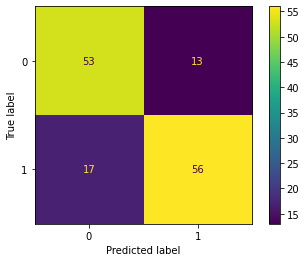

정확도:0.7842
정밀도:0.8116
재현율:0.7671
F1-Score:0.7887
Kappa Statistic:0.5685


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

# 혼동행렬 생성
confmat = confusion_matrix(y_test, pred)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=model_lgbm.classes_)
disp.plot()
plt.show()

# 정밀도, 재현율, f1 score, kappa 확인
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1_score = f1_score(y_test, pred)
kappa = cohen_kappa_score(y_test, pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test,pred)))
print('정밀도:{:.4f}'.format(precision))
print('재현율:{:.4f}'.format(recall))
print('F1-Score:{:.4f}'.format(f1_score))
print('Kappa Statistic:{:.4f}'.format(kappa))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        66
           1       0.81      0.77      0.79        73

    accuracy                           0.78       139
   macro avg       0.78      0.79      0.78       139
weighted avg       0.79      0.78      0.78       139



ROC AUC score: 0.8562


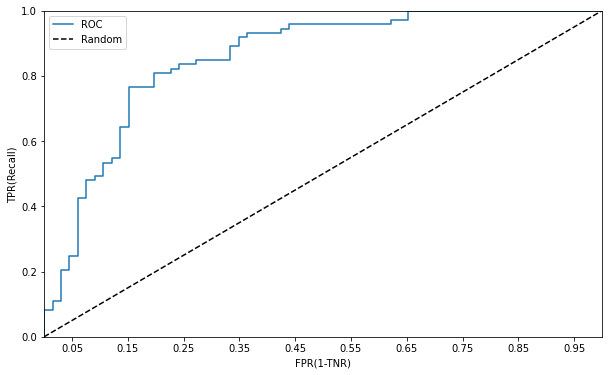

In [ ]:
# ROC, AUC 평가지표
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC, AUC 계산
lgbm_roc_score = roc_auc_score(y_test, model_lgbm.predict_proba(X_test)[:,1])

# 시각화
pred_proba_class1 = model_lgbm.predict_proba(X_test)[:, 1] 
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure(figsize=(10,6))

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--k', label= 'Random')

start, end = plt.xlim()

plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-TNR)')
plt.ylabel('TPR(Recall)')
plt.legend()

# AUC 점수 출력 
print('ROC AUC score: {:.4f}'.format(lgbm_roc_score))

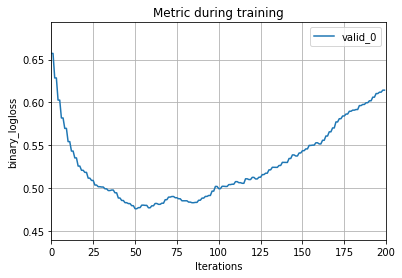

In [ ]:
plot_metric(model_lgbm)

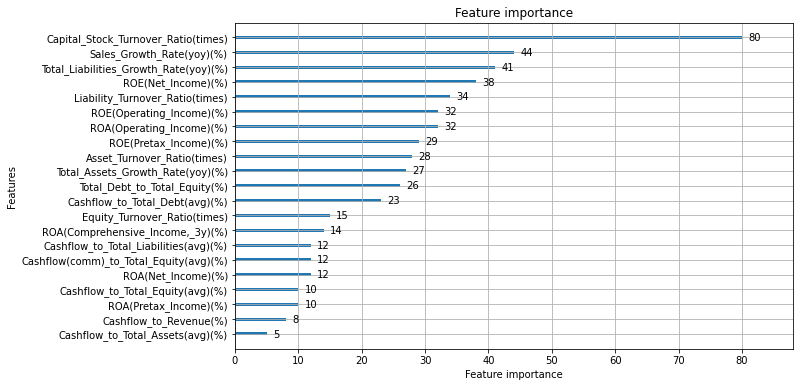

In [ ]:
plot_importance(model_lgbm, figsize=(10,6))

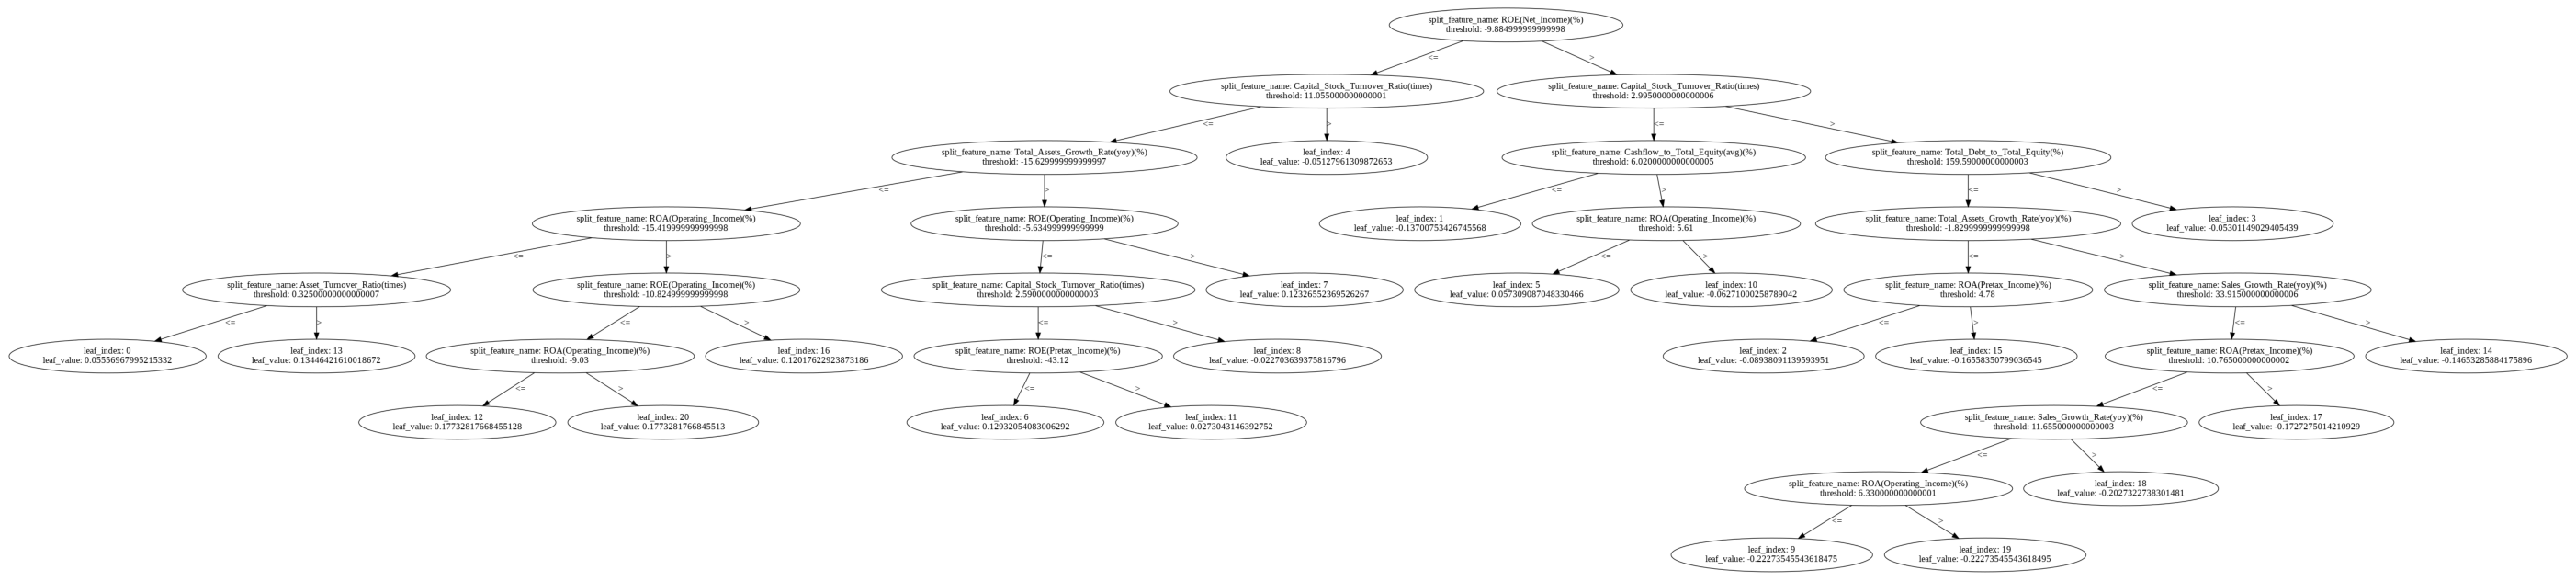

In [ ]:
plot_tree(model_lgbm, figsize=(50,40))